#Evaluation

In [125]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import os

### Load dataset

In [154]:
input_file_name = "lotOfFeatures.csv"
input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), input_file_name)

original_data = pd.read_csv(input_file_path, index_col=0, parse_dates=True)

In [155]:
start_time = '2012-02-01 00:00:00'
#start_time = '2014-02-01 00:00:00'
splitting_point = int(0.8 * original_data.shape[0])
splitting_time = original_data.iloc[[splitting_point]].index.to_pydatetime()[0]
#data = original_data[:splitting_time]
data = original_data[start_time:]

### Load validation dataset

In [638]:
file_names = ["validationResults_id11010024.csv", "validationResults_id14061721.csv", 
              "validationResults_id12041992.csv", "validationResults_id12041022_2.csv"]

validation_df = pd.DataFrame()
pd.options.display.float_format = '{:,.2f}'.format

for file_name in file_names:
    input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), file_name)
    df =  pd.read_csv(input_file_path, index_col=[0,1,2], header=[0,1])
    
    validation_df = pd.concat([validation_df, df], axis=1)

In [151]:
validation_df

sensor                                    id11010024                 \
error metric                                      R2 MAE  MAPE MASE   
horizon dataset       model                                           
1       Last value    Baselines                  0.6 0.6  46.0  0.9   
        Previous day  Baselines                  0.1 0.9  92.4  1.4   
        Previous week Baselines                  0.4 0.7  57.8  1.2   
        AR            Ridge Regression           0.7 0.6  51.8  1.0   
                      K Nearest Neighbors        0.7 0.6  53.7  1.0   
                      Random Forest              0.7 0.6  46.4  0.9   
        AR_WC_WF      Ridge Regression           0.7 0.6  53.8  1.0   
                      K Nearest Neighbors       -0.1 1.3 112.8  2.1   
                      Random Forest              0.7 0.5  43.4  0.9   
        AR_DT         Ridge Regression           0.7 0.6  54.8  1.0   
                      K Nearest Neighbors        0.7 0.6  46.6  1.0   
                      Random Forest              0.8 0.5  40.6  0.8   
        AR_WC_DT      Ridge Regression           0.7 0.6  55.6  1.0   
                      K Nearest Neighbors       -0.2 1.3 122.4  2.2   
                      Random Forest              0.8 0.5  40.1  0.9   
        AR_WF_DT      Ridge Regression           0.7 0.6  54.9  1.0   
                      K Nearest Neighbors        0.4 0.9  73.9  1.5   
                      Random Forest              0.8 0.5  40.7  0.8   
        ALL           Ridge Regression           0.7 0.6  55.7  1.0   
                      K Nearest Neighbors       -0.1 1.3 114.8  2.1   
                      Random Forest              0.8 0.5  40.1  0.9   
        TOP_20        Ridge Regression           0.7 0.6  54.1  1.0   
                      K Nearest Neighbors        0.6 0.7  59.4  1.2   
                      Random Forest              0.8 0.5  41.1  0.8   
        TOP_10        Ridge Regression           0.7 0.6  53.8  1.0   
                      K Nearest Neighbors        0.7 0.5  44.9  0.9   
                      Random Forest              0.8 0.5  41.3  0.8   
2       Last value    Baselines                  0.3 0.8  68.1  0.9   
        Previous day  Baselines                  0.1 0.9  92.4  1.0   
        Previous week Baselines                  0.4 0.7  57.8  0.8   
...                                              ...  ..   ...  ...   
23      TOP_10        Ridge Regression           0.6 0.7  64.6  0.7   
                      K Nearest Neighbors        0.6 0.7  56.2  0.7   
                      Random Forest              0.7 0.6  46.1  0.6   
24      Last value    Baselines                  0.1 0.9  86.5  1.0   
        Previous day  Baselines                  0.1 0.9  86.5  1.0   
        Previous week Baselines                  0.4 0.7  59.3  0.8   
        AR            Ridge Regression           0.6 0.7  61.7  0.8   
                      K Nearest Neighbors        0.5 0.7  65.4  0.8   
                      Random Forest              0.6 0.7  58.6  0.8   
        AR_WC_WF      Ridge Regression           0.6 0.7  64.3  0.9   
                      K Nearest Neighbors       -0.1 1.2 105.5  1.4   
                      Random Forest              0.6 0.7  55.9  0.8   
        AR_DT         Ridge Regression           0.6 0.7  66.6  0.8   
                      K Nearest Neighbors        0.6 0.7  51.4  0.8   
                      Random Forest              0.7 0.6  46.9  0.7   
        AR_WC_DT      Ridge Regression           0.6 0.7  67.2  0.8   
                      K Nearest Neighbors       -0.2 1.3 112.2  1.5   
                      Random Forest              0.7 0.6  48.6  0.7   
        AR_WF_DT      Ridge Regression           0.6 0.7  67.7  0.8   
                      K Nearest Neighbors        0.3 1.0  74.6  1.1   
                      Random Forest              0.7 0.6  46.6  0.7   
        ALL           Ridge Regression           0.6 0.7  68.1  0.8   
                      K 

Spliting the dataset into three parts: training, testing and evaluation (last 10 percent).

# Data

In [156]:
data.ix[:,0:16].describe()

,id14061671,id14061684,id14061709,id14061716,id14061685,id14061674,id14061721,id14061680,id14061714,id11010024,id11010019,id14061707,id11010017,id14061677,id11010020,id14061729
count,"105,312.00","105,312.00","105,312.00","105,312.00","105,312.00","105,312.00","105,312.00","105,312.00","105,312.00","105,312.00","105,312.00","105,312.00","105,312.00","105,312.00","105,312.00","105,312.00"
mean,198.69,93.10,63.46,31.90,18.26,9.64,7.02,4.75,4.19,1.31,1.31,0.34,0.45,0.29,0.29,0.02
std,261.09,80.37,24.20,29.93,15.79,4.26,5.70,2.13,3.06,1.65,1.65,0.96,1.06,0.81,0.81,0.25
min,0.00,0.00,0.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,45.00,9.00,9.00,6.00,3.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,52.00,119.00,62.00,15.00,14.00,9.00,5.00,4.00,4.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,344.00,163.00,80.65,56.00,22.00,12.00,9.00,6.00,6.00,1.00,1.00,0.10,1.00,0.00,0.00,0.00
max,"1,004.00",302.00,163.00,152.00,192.00,38.00,47.00,19.00,18.00,12.70,12.70,24.40,27.00,12.00,12.00,6.10


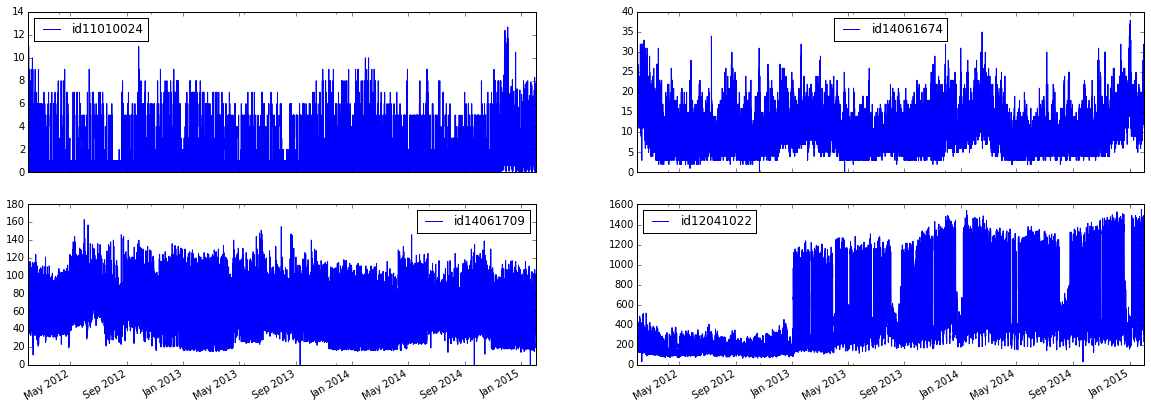

In [162]:
_ = data[[ "id11010024", 'id14061674', 'id14061709', "id12041022",]].plot(
    subplots=True, layout=(2,2), style=['b','b','b','b'], figsize=(20,7), x_compat=True)

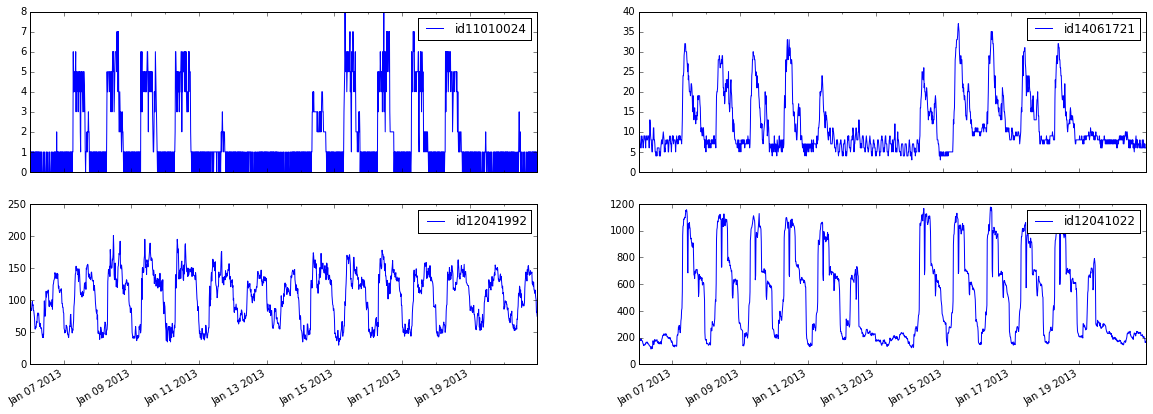

In [163]:
_ = data['2013-01-6':'2013-01-20'][["id11010024", 'id14061721', 'id12041992', "id12041022"]].plot(
    subplots=True, layout=(2,2), style=['b','b','b','b'], figsize=(20,7), x_compat=True)

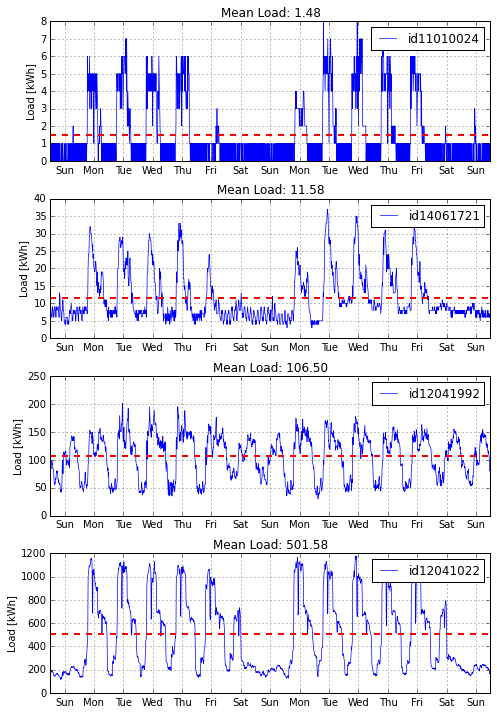

In [164]:
data_to_plot = data['2013-01-6':'2013-01-20'][["id11010024", 'id14061721', 'id12041992', "id12041022"]]

fig, axx = plt.subplots((data_to_plot.shape[1]), figsize=(7,10))
#fig, axx = plt.subplots(2, 2, figsize=(20,10))
for x, columns in enumerate(data_to_plot):
    axx[x].plot_date(data_to_plot.index.to_pydatetime(), data_to_plot[columns], fmt='-', label=columns, linewidth=0.7)
    axx[x].xaxis.set_major_locator(dates.HourLocator(byhour=12))
    axx[x].xaxis.set_major_formatter(dates.DateFormatter('%a'))
    
    axx[x].axhline(data_to_plot[columns].mean(), color='r', linestyle='dashed', linewidth=2)
    
    axx[x].set_title("Mean Load: {:.2f}".format(data_to_plot[columns].mean()))
    axx[x].set_ylabel("Load [kWh]")
        
    axx[x].legend()
    axx[x].grid()

plt.tight_layout()

In [165]:
data_to_plot.describe()

,id11010024,id14061721,id12041992,id12041022
count,"1,440.00","1,440.00","1,440.00","1,440.00"
mean,1.48,11.58,106.50,501.58
std,1.87,7.09,38.38,324.84
min,0.00,3.00,30.00,115.00
25%,0.00,7.00,70.00,211.75
50%,1.00,8.00,116.00,377.00
75%,2.00,15.00,138.00,707.25
max,8.00,37.00,201.00,"1,177.00"


# Validation Analyisis

In [166]:
validation_df

sensor                                    id11010024                   \
error metric                                      R2  MAE   MAPE MASE   
horizon dataset       model                                             
1       Last value    Baselines                 0.55 0.56  46.05 0.92   
        Previous day  Baselines                 0.12 0.87  92.36 1.43   
        Previous week Baselines                 0.43 0.70  57.78 1.15   
        AR            Ridge Regression          0.71 0.58  51.79 0.95   
                      K Nearest Neighbors       0.68 0.59  53.69 0.97   
                      Random Forest             0.74 0.55  46.36 0.91   
        AR_WC_WF      Ridge Regression          0.72 0.59  53.84 0.98   
                      K Nearest Neighbors      -0.13 1.25 112.81 2.07   
                      Random Forest             0.74 0.54  43.45 0.89   
        AR_DT         Ridge Regression          0.73 0.59  54.79 0.97   
                      K Nearest Neighbors       0.67 0.59  46.56 0.98   
                      Random Forest             0.78 0.51  40.55 0.84   
        AR_WC_DT      Ridge Regression          0.73 0.60  55.56 0.98   
                      K Nearest Neighbors      -0.19 1.31 122.38 2.17   
                      Random Forest             0.77 0.52  40.14 0.85   
        AR_WF_DT      Ridge Regression          0.73 0.59  54.86 0.97   
                      K Nearest Neighbors       0.38 0.90  73.90 1.48   
                      Random Forest             0.78 0.51  40.70 0.84   
        ALL           Ridge Regression          0.73 0.60  55.73 0.98   
                      K Nearest Neighbors      -0.14 1.27 114.84 2.09   
                      Random Forest             0.77 0.52  40.10 0.85   
        TOP_20        Ridge Regression          0.73 0.59  54.11 0.97   
                      K Nearest Neighbors       0.58 0.71  59.42 1.17   
                      Random Forest             0.77 0.51  41.12 0.85   
        TOP_10        Ridge Regression          0.73 0.58  53.82 0.96   
                      K Nearest Neighbors       0.73 0.54  44.95 0.89   
                      Random Forest             0.77 0.51  41.30 0.85   
2       Last value    Baselines                 0.29 0.75  68.09 0.90   
        Previous day  Baselines                 0.12 0.87  92.38 1.03   
        Previous week Baselines                 0.43 0.70  57.79 0.83   
...                                              ...  ...    ...  ...   
23      TOP_10        Ridge Regression          0.61 0.72  64.62 0.72   
                      K Nearest Neighbors       0.57 0.68  56.23 0.68   
                      Random Forest             0.65 0.62  46.06 0.62   
24      Last value    Baselines                 0.13 0.86  86.51 0.99   
        Previous day  Baselines                 0.13 0.86  86.51 0.99   
        Previous week Baselines                 0.41 0.71  59.29 0.81   
        AR            Ridge Regression          0.56 0.73  61.71 0.83   
                      K Nearest Neighbors       0.50 0.73  65.35 0.84   
                      Random Forest             0.59 0.69  58.62 0.79   
        AR_WC_WF      Ridge Regression          0.57 0.74  64.28 0.85   
                      K Nearest Neighbors      -0.11 1.24 105.47 1.42   
                      Random Forest             0.60 0.68  55.92 0.78   
        AR_DT         Ridge Regression          0.61 0.72  66.62 0.83   
                      K Nearest Neighbors       0.58 0.67  51.41 0.77   
                      Random Forest             0.70 0.60  46.87 0.68   
        AR_WC_DT      Ridge Regression          0.60 0.74  67.20 0.85   
                      K Nearest Neighbors      -0.15 1.28 112.18 1.48   
                      Random Forest             0.68 0.62  48.57 0.71   
        AR_WF_DT      Ridge Regression          0.61 0.73  67.69 0.84   
                      K Nearest Neighbors       0.27 0.96  74.55 1.11   
                      Random Forest             0.71 0.59 

In [174]:
validation_df.groupby(level=['dataset', 'model'], sort=False).mean()

sensor                            id11010024                  id14061721       \
error metric                              R2  MAE   MAPE MASE         R2  MAE   
dataset       model                                                             
Last value    Baselines                -0.63 1.36 117.54 0.97      -0.35 3.35   
Previous day  Baselines                 0.13 0.87  89.51 0.68       0.39 2.01   
Previous week Baselines                 0.43 0.70  58.31 0.55       0.65 1.55   
AR            Ridge Regression          0.58 0.70  58.87 0.54       0.74 1.47   
              K Nearest Neighbors       0.53 0.71  61.01 0.55       0.68 1.60   
              Random Forest             0.59 0.68  54.17 0.52       0.73 1.55   
AR_WC_WF      Ridge Regression          0.58 0.73  62.51 0.56       0.74 1.58   
              K Nearest Neighbors      -0.11 1.21 106.97 0.95      -0.31 3.64   
              Random Forest             0.60 0.69  53.94 0.53       0.75 1.47   
AR_DT         Ridge Regression          0.62 0.71  65.86 0.55       0.78 1.50   
              K Nearest Neighbors       0.59 0.67  49.24 0.52       0.68 1.60   
              Random Forest             0.70 0.59  45.51 0.46       0.80 1.35   
AR_WC_DT      Ridge Regression          0.62 0.72  66.93 0.56       0.77 1.55   
              K Nearest Neighbors      -0.18 1.25 110.89 0.98      -0.32 3.68   
              Random Forest             0.69 0.61  45.46 0.47       0.81 1.32   
AR_WF_DT      Ridge Regression          0.62 0.71  67.13 0.55       0.77 1.53   
              K Nearest Neighbors       0.28 0.96  76.76 0.75       0.56 1.98   
              Random Forest             0.71 0.59  45.48 0.45       0.83 1.29   
ALL           Ridge Regression          0.62 0.72  67.52 0.56       0.77 1.56   
              K Nearest Neighbors      -0.12 1.21 105.94 0.95      -0.33 3.66   
              Random Forest             0.70 0.61  45.28 0.47       0.82 1.30   
TOP_20        Ridge Regression          0.62 0.72  68.05 0.55       0.77 1.53   
              K Nearest Neighbors       0.46 0.80  69.86 0.62       0.68 1.63   
              Random Forest             0.69 0.61  45.88 0.47       0.82 1.29   
TOP_10        Ridge Regression          0.62 0.71  66.12 0.55       0.77 1.51   
              K Nearest Neighbors       0.59 0.67  54.74 0.52       0.70 1.53   
              Random Forest             0.65 0.62  45.94 0.48       0.80 1.35   

sensor                                        id12041992                   \
error metric                        MAPE MASE         R2   MAE  MAPE MASE   
dataset       model                                                         
Last value    Baselines            67.30 0.77      -0.77 36.90 47.14 1.01   
Previous day  Baselines            41.39 0.52       0.38 19.85 23.33 0.61   
Previous week Baselines            30.69 0.40       0.55 17.35 20.33 0.53   
AR            Ridge Regression     33.56 0.37       0.68 15.17 18.78 0.46   
              K Nearest Neighbors  34.79 0.41       0.48 19.50 25.07 0.59   
              Random Forest        37.61 0.39       0.67 15.42 19.93 0.47   
AR_WC_WF      Ridge Regression     38.81 0.40       0.67 15.43 19.44 0.47   
              K Nearest Neighbors 100.24 0.94       0.04 26.92 36.75 0.82   
              Random Forest        35.98 0.37       0.67 15.30 19.77 0.46   
AR_DT         Ridge Regression     36.53 0.38       0.72 14.43 18.25 0.44   
              K Nearest Neighbors  33.61 0.41       0.45 20.10 25.88 0.61   
              Random Forest        31.51 0.34       0.73 14.02 18.12 0.43   
AR_WC_DT      Ridge Regression     38.33 0.39       0.72 14.54 18.40 0.44   
              K Nearest Neighbors 101.95 0.96       0.00 27.54 37.94 0.84   
              Random Forest        31.38 0.33       0.73 14.08 18.20 0.43   
AR_WF_DT      Ridge Regression     37.38 0.39       0.72 14.46 18.26 0.44   
              K Nearest Neighbors  47.41 0.50       0.41 20.93 26.94 0.63   
              Random Forest  

## Average for all horizons and sensors

In [186]:
validation_df.groupby(level=['dataset', 'model'], sort=False).mean().groupby(level='error metric', axis=1, sort=False).mean()

error metric                        MAE  MAPE  MASE    R2
dataset       model                                      
Last value    Baselines           95.45 73.02  0.98 -0.55
Previous day  Baselines           50.12 47.61  0.63  0.31
Previous week Baselines           31.80 32.46  0.48  0.58
AR            Ridge Regression    32.98 33.12  0.46  0.69
              K Nearest Neighbors 68.24 41.47  0.64  0.46
              Random Forest       24.00 31.64  0.42  0.72
AR_WC_WF      Ridge Regression    32.92 35.66  0.47  0.70
              K Nearest Neighbors 73.73 72.87  0.94 -0.08
              Random Forest       27.88 31.63  0.43  0.71
AR_DT         Ridge Regression    31.51 35.53  0.45  0.74
              K Nearest Neighbors 68.38 38.44  0.63  0.47
              Random Forest       20.38 26.83  0.37  0.79
AR_WC_DT      Ridge Regression    30.55 36.13  0.45  0.74
              K Nearest Neighbors 73.95 74.59  0.95 -0.11
              Random Forest       24.74 27.29  0.39  0.77
AR_WF_DT      Ridge Regression    31.40 36.05  0.45  0.74
              K Nearest Neighbors 68.64 49.00  0.72  0.35
              Random Forest       20.53 26.59  0.37  0.80
ALL           Ridge Regression    30.49 36.37  0.45  0.74
              K Nearest Neighbors 73.73 72.82  0.94 -0.08
              Random Forest       24.68 27.14  0.39  0.78
TOP_20        Ridge Regression    29.98 36.22  0.45  0.74
              K Nearest Neighbors 24.74 35.49  0.46  0.66
              Random Forest       23.97 26.99  0.38  0.77
TOP_10        Ridge Regression    30.01 35.46  0.44  0.74
              K Nearest Neighbors 24.85 30.78  0.43  0.69
              Random Forest       20.78 26.81  0.38  0.77

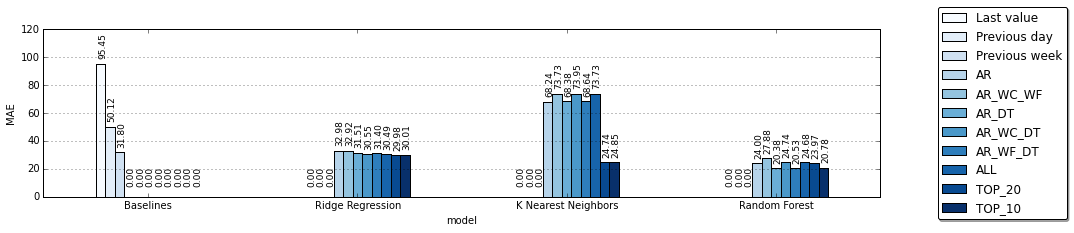

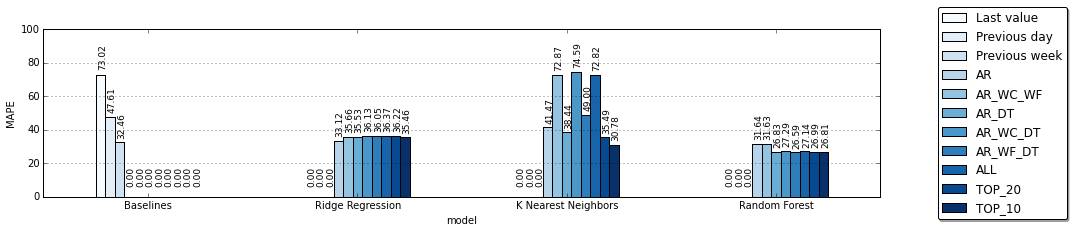

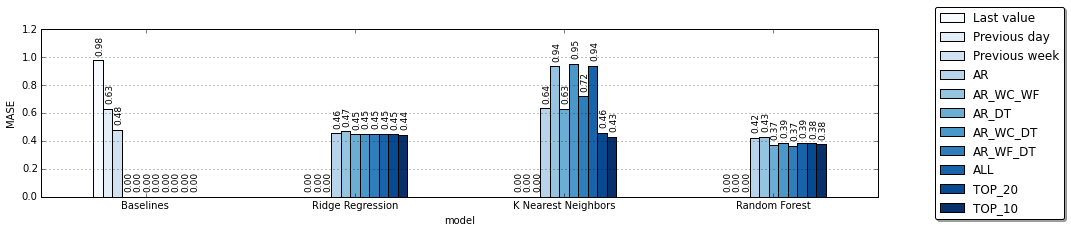

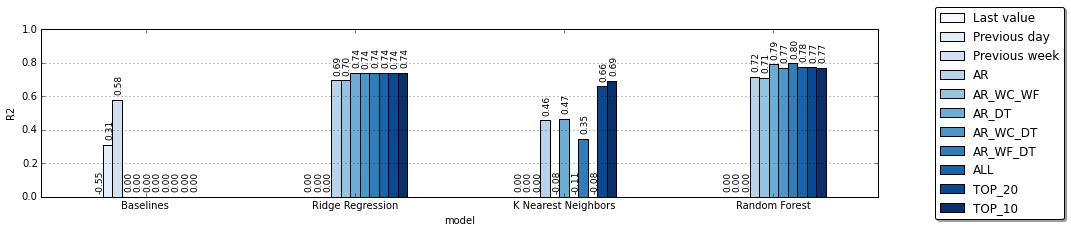

In [354]:
validation_plot_properties = [
    {'err_name': "MAE", 'lim': [0,120], 'h_delta': 16},
    {'err_name': "MAPE", 'lim': [0,100], 'h_delta': 13},
    {'err_name': "MASE", 'lim': [0,1.2], 'h_delta': 0.12},
    {'err_name': "R2", 'lim': [0,1], 'h_delta': 0.1},
    ]

#for error_metric in validation_df.columns.get_level_values(1).unique():
for properties in validation_plot_properties:
    
    temp_df = validation_df.groupby(level=['dataset', 'model'], sort=False).mean().groupby(
        level='error metric', axis=1, sort=False).mean()[properties['err_name']].unstack(0)

    temp_df = temp_df.reindex(validation_df.index.get_level_values(2).unique())
    temp_df = temp_df.reindex_axis(validation_df.index.get_level_values(1).unique(), axis=1)

    err = validation_df.groupby(level=['dataset', 'model'], sort=False).mean().groupby(
        level='error metric', axis=1, sort=False).std()[properties['err_name']].unstack(0)
    
    ax = temp_df.plot(kind='bar', figsize=(15,3),  colormap='Blues', ylim=properties['lim'])
    #ax = temp_df.plot(kind='bar', yerr=err, figsize=(15,4),  colormap='Blues')

    for p in ax.patches:

        label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
        height = p.get_height() + properties['h_delta'] if p.get_y() >= 0 else properties['h_delta']*1.1

        ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - 0.01, height), fontsize=9, ha='center', rotation=90)

    plt.gca().yaxis.grid(True)
    plt.xticks(rotation=0)
    ax.set_ylabel(properties['err_name'])
    plt.legend(loc='right', bbox_to_anchor=(1.23, 0.5), ncol=1, fancybox=True, shadow=True)

## Evaluation for diferent sensors

### MAPE

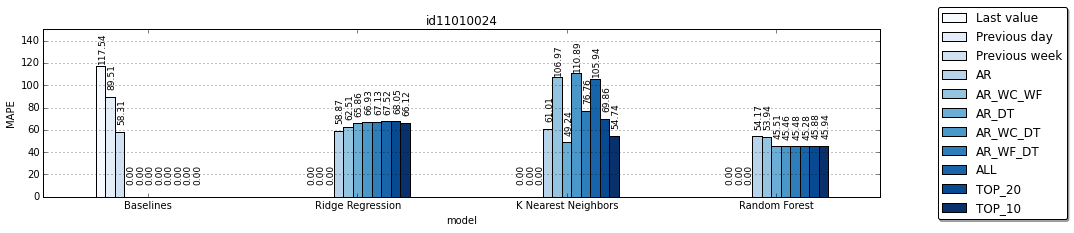

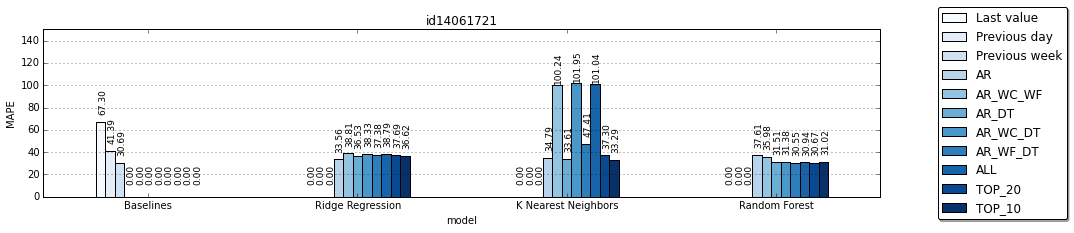

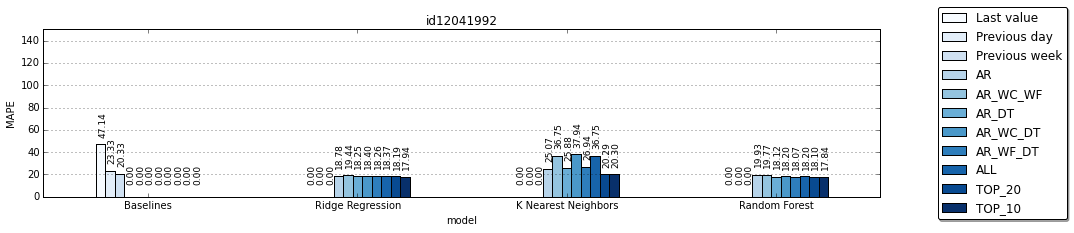

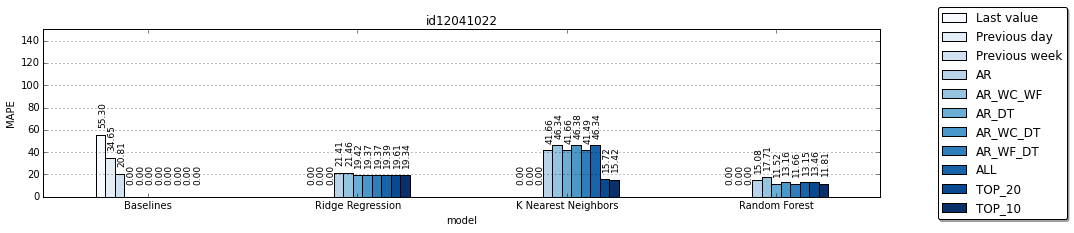

In [485]:
#validation_df.groupby(level=['dataset', 'model'], sort=False).mean()["id11010024"][["MAPE"]].unstack(0).plot(
#    kind='bar', figsize=(15,3),  colormap='Blues')

validation_plot_properties = [
    {'sensor': "id11010024", 'lim': [0,120], 'h_delta': 16},
    {'sensor': "id14061721", 'lim': [0,100], 'h_delta': 13},
    {'sensor': "id12041992", 'lim': [0,1.2], 'h_delta': 0.12},
    {'sensor': "id12041022", 'lim': [0,1], 'h_delta': 0.1},
    ]

#for error_metric in validation_df.columns.get_level_values(1).unique():
for sensor in validation_df.columns.get_level_values(0).unique():

    temp_df = validation_df.groupby(level=['dataset', 'model'], sort=False).mean()[sensor][["MAPE"]].unstack(0)
    temp_df.columns = temp_df.columns.droplevel(0)
    temp_df = temp_df.reindex(validation_df.index.get_level_values(2).unique())
    temp_df = temp_df.reindex_axis(validation_df.index.get_level_values(1).unique(), axis=1)

    ax = temp_df.plot(kind='bar', figsize=(15,3),  colormap='Blues', ylim=[0,150])
    #ax = temp_df.plot(kind='bar', yerr=err, figsize=(15,4),  colormap='Blues')

    for p in ax.patches:

        label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
        height = p.get_height() + 22 if p.get_y() >= 0 else 22*1.1

        ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - 0.01, height), fontsize=9, ha='center', rotation=90)

    plt.gca().yaxis.grid(True)
    plt.xticks(rotation=0)
    ax.set_title(sensor)
    ax.set_ylabel("MAPE")
    plt.legend(loc='right', bbox_to_anchor=(1.23, 0.5), ncol=1, fancybox=True, shadow=True)

### MASE

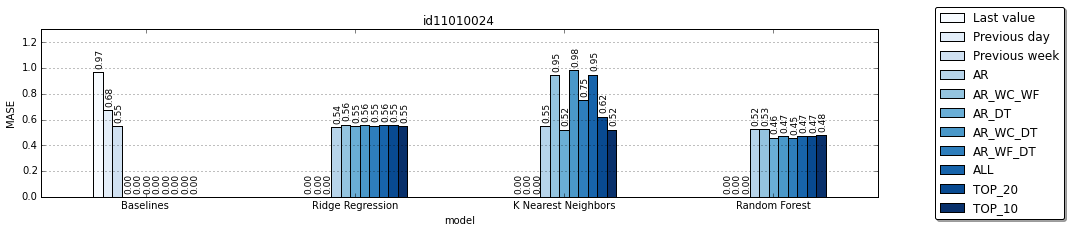

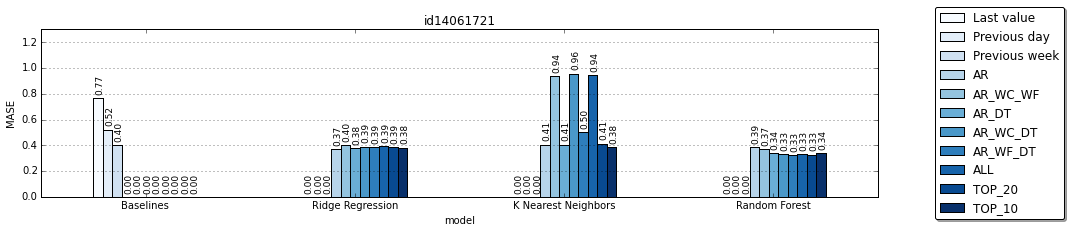

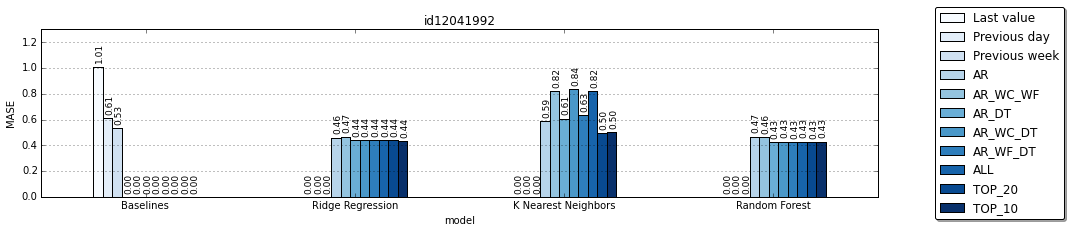

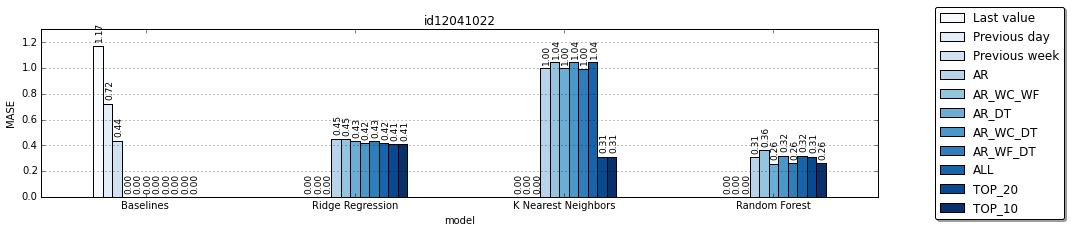

In [488]:
#validation_df.groupby(level=['dataset', 'model'], sort=False).mean()["id11010024"][["MAPE"]].unstack(0).plot(
#    kind='bar', figsize=(15,3),  colormap='Blues')

validation_plot_properties = [
    {'sensor': "id11010024", 'lim': [0,120], 'h_delta': 16},
    {'sensor': "id14061721", 'lim': [0,100], 'h_delta': 13},
    {'sensor': "id12041992", 'lim': [0,1.2], 'h_delta': 0.12},
    {'sensor': "id12041022", 'lim': [0,1], 'h_delta': 0.1},
    ]

#for error_metric in validation_df.columns.get_level_values(1).unique():
for sensor in validation_df.columns.get_level_values(0).unique():

    temp_df = validation_df.groupby(level=['dataset', 'model'], sort=False).mean()[sensor][["MASE"]].unstack(0)
    temp_df.columns = temp_df.columns.droplevel(0)
    temp_df = temp_df.reindex(validation_df.index.get_level_values(2).unique())
    temp_df = temp_df.reindex_axis(validation_df.index.get_level_values(1).unique(), axis=1)

    ax = temp_df.plot(kind='bar', figsize=(15,3),  colormap='Blues', ylim=[0,1.3])
    #ax = temp_df.plot(kind='bar', yerr=err, figsize=(15,4),  colormap='Blues')

    for p in ax.patches:

        label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
        height = p.get_height() + 0.12 if p.get_y() >= 0 else 0.12*1.1

        ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - 0.01, height), fontsize=9, ha='center', rotation=90)

    plt.gca().yaxis.grid(True)
    plt.xticks(rotation=0)
    ax.set_title(sensor)
    ax.set_ylabel("MASE")
    plt.legend(loc='right', bbox_to_anchor=(1.23, 0.5), ncol=1, fancybox=True, shadow=True)

### R2 

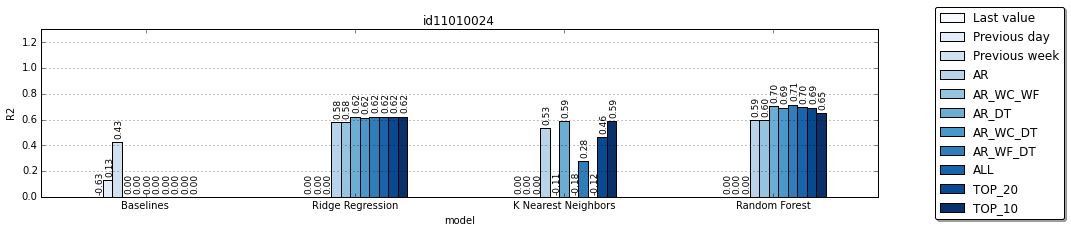

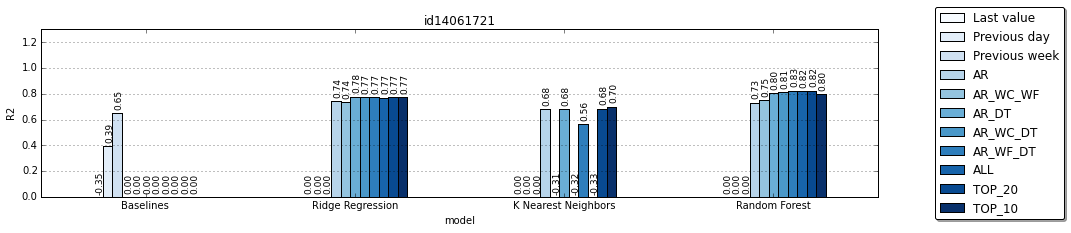

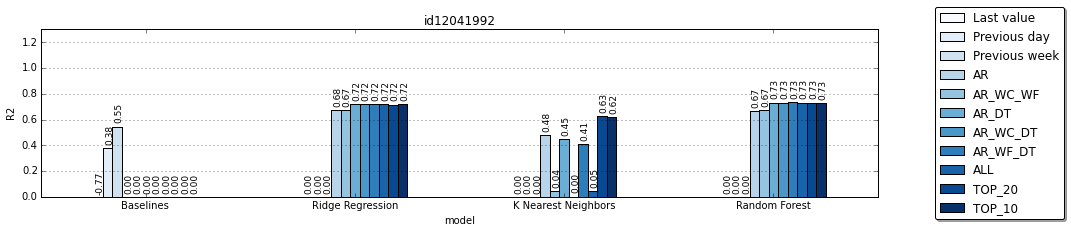

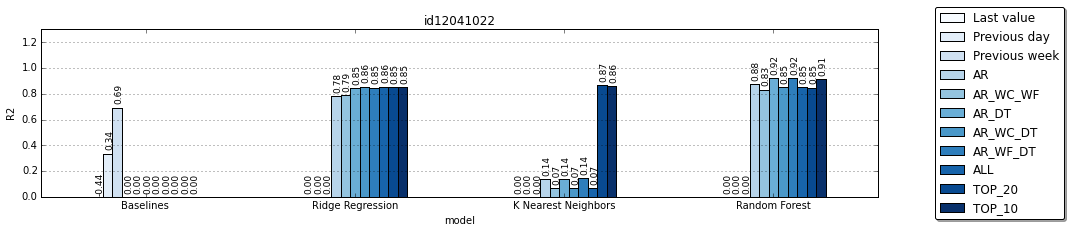

In [507]:
#validation_df.groupby(level=['dataset', 'model'], sort=False).mean()["id11010024"][["MAPE"]].unstack(0).plot(
#    kind='bar', figsize=(15,3),  colormap='Blues')

validation_plot_properties = [
    {'sensor': "id11010024", 'lim': [0,120], 'h_delta': 16},
    {'sensor': "id14061721", 'lim': [0,100], 'h_delta': 13},
    {'sensor': "id12041992", 'lim': [0,1.2], 'h_delta': 0.12},
    {'sensor': "id12041022", 'lim': [0,1], 'h_delta': 0.1},
    ]

#for error_metric in validation_df.columns.get_level_values(1).unique():
for sensor in validation_df.columns.get_level_values(0).unique():

    temp_df = validation_df.groupby(level=['dataset', 'model'], sort=False).mean()[sensor][["R2"]].unstack(0)
    temp_df.columns = temp_df.columns.droplevel(0)
    temp_df = temp_df.reindex(validation_df.index.get_level_values(2).unique())
    temp_df = temp_df.reindex_axis(validation_df.index.get_level_values(1).unique(), axis=1)

    ax = temp_df.plot(kind='bar', figsize=(15,3),  colormap='Blues', ylim=[0,1.3])
    #ax = temp_df.plot(kind='bar', yerr=err, figsize=(15,4),  colormap='Blues')

    for p in ax.patches:

        label = p.get_height() if p.get_y() >= 0 else p.get_height() * -1
        height = p.get_height() + 0.12 if p.get_y() >= 0 else 0.12*1.1

        ax.annotate(str("%.2f" % label), (p.get_x()+p.get_width() - 0.01, height), fontsize=9, ha='center', rotation=90)

    plt.gca().yaxis.grid(True)
    plt.xticks(rotation=0)
    ax.set_title(sensor)
    ax.set_ylabel("R2")
    plt.legend(loc='right', bbox_to_anchor=(1.23, 0.5), ncol=1, fancybox=True, shadow=True)

In [476]:
validation_df.groupby(level=['dataset', 'model'], sort=False).mean()

sensor                            id11010024                  id14061721       \
error metric                              R2  MAE   MAPE MASE         R2  MAE   
dataset       model                                                             
Last value    Baselines                -0.63 1.36 117.54 0.97      -0.35 3.35   
Previous day  Baselines                 0.13 0.87  89.51 0.68       0.39 2.01   
Previous week Baselines                 0.43 0.70  58.31 0.55       0.65 1.55   
AR            Ridge Regression          0.58 0.70  58.87 0.54       0.74 1.47   
              K Nearest Neighbors       0.53 0.71  61.01 0.55       0.68 1.60   
              Random Forest             0.59 0.68  54.17 0.52       0.73 1.55   
AR_WC_WF      Ridge Regression          0.58 0.73  62.51 0.56       0.74 1.58   
              K Nearest Neighbors      -0.11 1.21 106.97 0.95      -0.31 3.64   
              Random Forest             0.60 0.69  53.94 0.53       0.75 1.47   
AR_DT         Ridge Regression          0.62 0.71  65.86 0.55       0.78 1.50   
              K Nearest Neighbors       0.59 0.67  49.24 0.52       0.68 1.60   
              Random Forest             0.70 0.59  45.51 0.46       0.80 1.35   
AR_WC_DT      Ridge Regression          0.62 0.72  66.93 0.56       0.77 1.55   
              K Nearest Neighbors      -0.18 1.25 110.89 0.98      -0.32 3.68   
              Random Forest             0.69 0.61  45.46 0.47       0.81 1.32   
AR_WF_DT      Ridge Regression          0.62 0.71  67.13 0.55       0.77 1.53   
              K Nearest Neighbors       0.28 0.96  76.76 0.75       0.56 1.98   
              Random Forest             0.71 0.59  45.48 0.45       0.83 1.29   
ALL           Ridge Regression          0.62 0.72  67.52 0.56       0.77 1.56   
              K Nearest Neighbors      -0.12 1.21 105.94 0.95      -0.33 3.66   
              Random Forest             0.70 0.61  45.28 0.47       0.82 1.30   
TOP_20        Ridge Regression          0.62 0.72  68.05 0.55       0.77 1.53   
              K Nearest Neighbors       0.46 0.80  69.86 0.62       0.68 1.63   
              Random Forest             0.69 0.61  45.88 0.47       0.82 1.29   
TOP_10        Ridge Regression          0.62 0.71  66.12 0.55       0.77 1.51   
              K Nearest Neighbors       0.59 0.67  54.74 0.52       0.70 1.53   
              Random Forest             0.65 0.62  45.94 0.48       0.80 1.35   

sensor                                        id12041992                   \
error metric                        MAPE MASE         R2   MAE  MAPE MASE   
dataset       model                                                         
Last value    Baselines            67.30 0.77      -0.77 36.90 47.14 1.01   
Previous day  Baselines            41.39 0.52       0.38 19.85 23.33 0.61   
Previous week Baselines            30.69 0.40       0.55 17.35 20.33 0.53   
AR            Ridge Regression     33.56 0.37       0.68 15.17 18.78 0.46   
              K Nearest Neighbors  34.79 0.41       0.48 19.50 25.07 0.59   
              Random Forest        37.61 0.39       0.67 15.42 19.93 0.47   
AR_WC_WF      Ridge Regression     38.81 0.40       0.67 15.43 19.44 0.47   
              K Nearest Neighbors 100.24 0.94       0.04 26.92 36.75 0.82   
              Random Forest        35.98 0.37       0.67 15.30 19.77 0.46   
AR_DT         Ridge Regression     36.53 0.38       0.72 14.43 18.25 0.44   
              K Nearest Neighbors  33.61 0.41       0.45 20.10 25.88 0.61   
              Random Forest        31.51 0.34       0.73 14.02 18.12 0.43   
AR_WC_DT      Ridge Regression     38.33 0.39       0.72 14.54 18.40 0.44   
              K Nearest Neighbors 101.95 0.96       0.00 27.54 37.94 0.84   
              Random Forest        31.38 0.33       0.73 14.08 18.20 0.43   
AR_WF_DT      Ridge Regression     37.38 0.39       0.72 14.46 18.26 0.44   
              K Nearest Neighbors  47.41 0.50       0.41 20.93 26.94 0.63   
              Random Forest  

In [497]:
validation_df.groupby(level=['dataset', 'model'], sort=False).mean().xs(
    'MAPE',level="error metric",axis=1).ix[['AR_WF_DT','AR']]

sensor                        id11010024  id14061721  id12041992  id12041022
dataset  model                                                              
AR_WF_DT Ridge Regression          67.13       37.38       18.26       21.44
         K Nearest Neighbors       76.76       47.41       26.94       44.88
         Random Forest             45.48       30.55       18.07       12.27
AR       Ridge Regression          58.87       33.56       18.78       21.27
         K Nearest Neighbors       61.01       34.79       25.07       45.03
         Random Forest             54.17       37.61       19.93       14.86

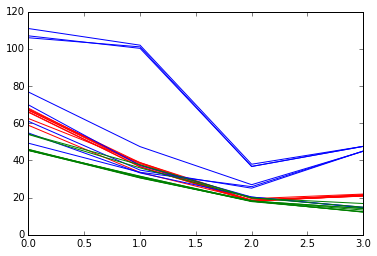

In [584]:
plt.plot(validation_df.groupby(level=['dataset', 'model'], sort=False).mean().xs(
    'MAPE',level="error metric",axis=1).xs('Ridge Regression',level="model",axis=0).transpose(),'r')
plt.plot(validation_df.groupby(level=['dataset', 'model'], sort=False).mean().xs(
    'MAPE',level="error metric",axis=1).xs('K Nearest Neighbors',level="model",axis=0).transpose(), 'b')
plt.plot(validation_df.groupby(level=['dataset', 'model'], sort=False).mean().xs(
    'MAPE',level="error metric",axis=1).xs('Random Forest',level="model",axis=0).transpose(), 'g')
# LEGEND??

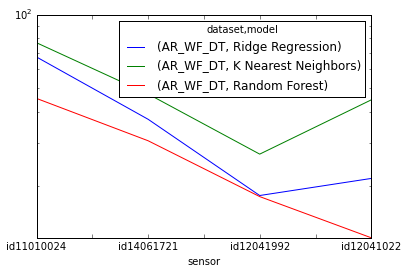

In [557]:
validation_df.groupby(level=['dataset', 'model'], sort=False).mean().xs(
    'MAPE',level="error metric",axis=1).ix[['AR_WF_DT']].transpose().plot(logy=True, ylim=(0,100))

## Evaluation Scores Over All Horizons

In [627]:
validation_df.columns.get_level_values(1).unique()

array(['R2', 'MAE', 'MAPE', 'MASE'], dtype=object)

In [642]:
validation_df.index.get_level_values(2).unique()[1:4]

array(['Ridge Regression', 'K Nearest Neighbors', 'Random Forest'], dtype=object)

In [643]:
validation_df.xs('AR_WF_DT',level="dataset").groupby(level='error metric', axis=1).mean().unstack()["MAPE"].reindex_axis(
    validation_df.index.get_level_values(2).unique()[1:4], axis=1)

model,Ridge Regression,K Nearest Neighbors,Random Forest
horizon,,,
1,27.75,42.91,22.07
2,33.06,44.76,24.64
3,35.23,46.18,25.39
4,36.08,47.22,26.10
5,36.57,48.42,26.28
6,36.85,49.04,26.46
7,37.31,49.60,27.10
8,37.55,49.84,27.34
9,37.34,49.00,27.42


### Average error for different horizons

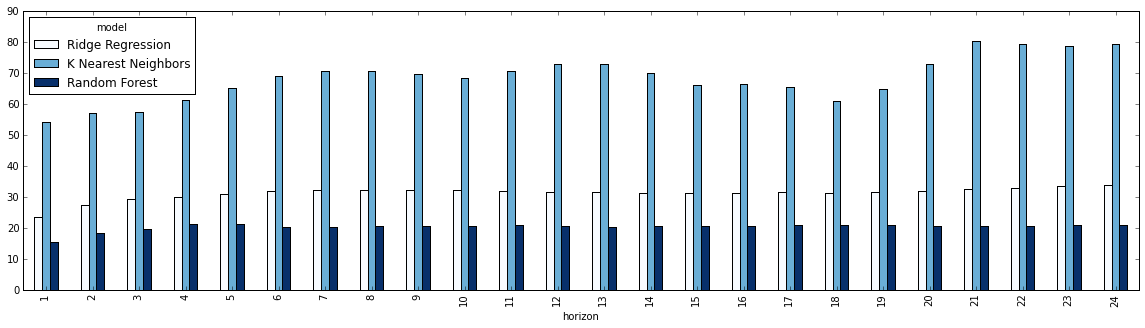

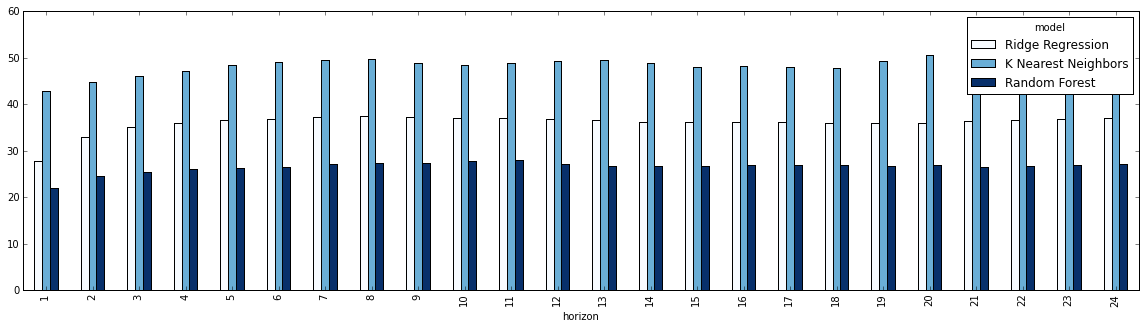

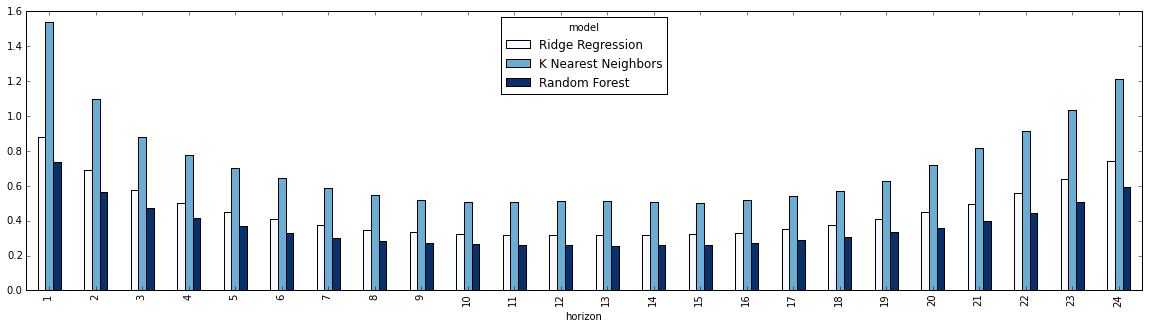

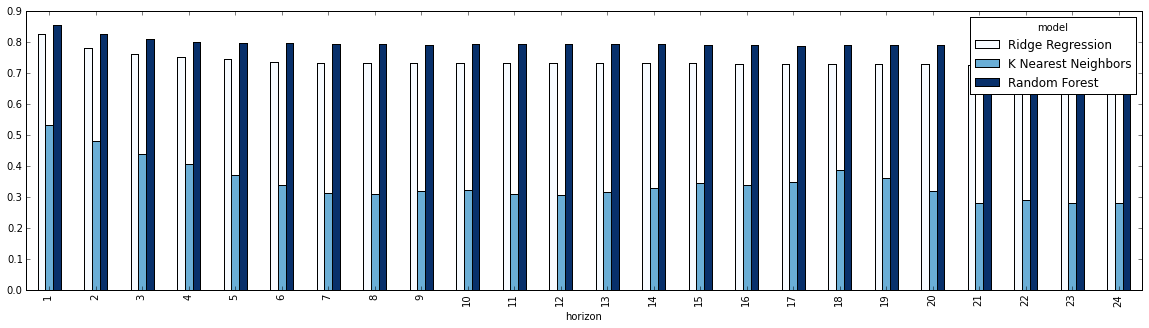

In [658]:
for err_measure in ["MAE","MAPE","MASE","R2"]:
    
    validation_df.xs('AR_WF_DT',level="dataset").groupby(level='error metric', axis=1).mean().unstack()[err_measure].reindex_axis(
        validation_df.index.get_level_values(2).unique()[1:4], axis=1).plot(kind='bar', figsize=(20,5), colormap='Blues')

### Error for id22

In [662]:
validation_df.columns.get_level_values(0).unique()

array(['id11010024', 'id14061721', 'id12041992', 'id12041022'], dtype=object)

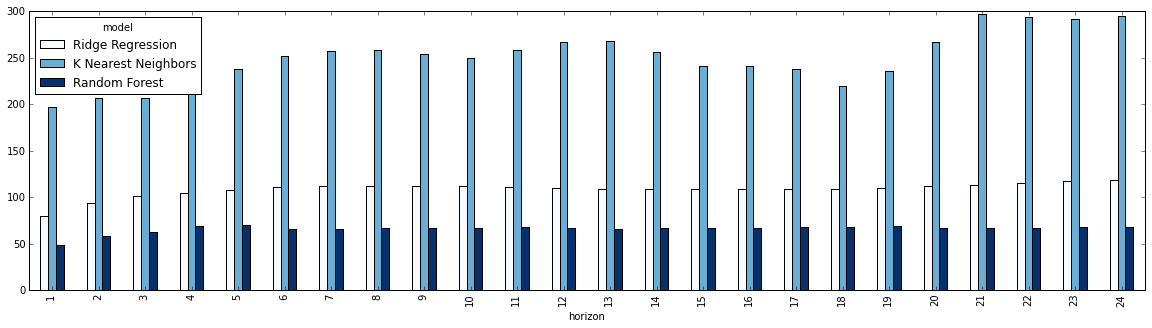

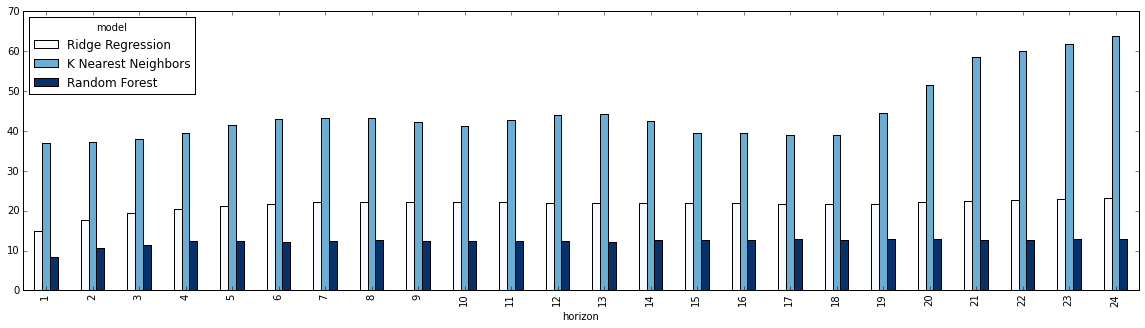

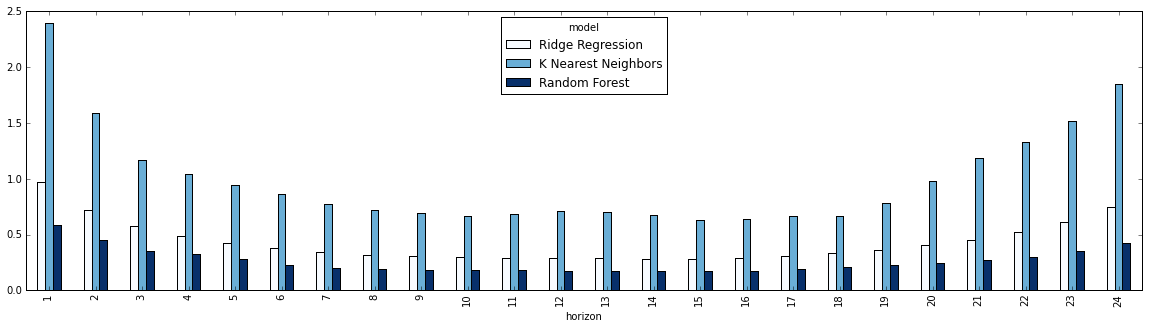

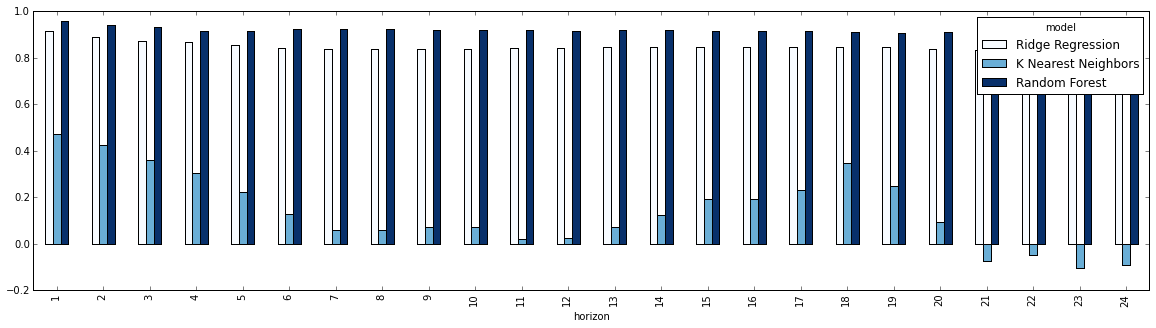

In [664]:
for err_measure in ["MAE","MAPE","MASE","R2"]:

    validation_df.xs('AR_WF_DT',level="dataset")["id12041022"][err_measure].unstack().reindex_axis(
            validation_df.index.get_level_values(2).unique()[1:4], axis=1).plot(kind='bar', figsize=(20,5), colormap='Blues')

### Random forest error for different sensors and horizons

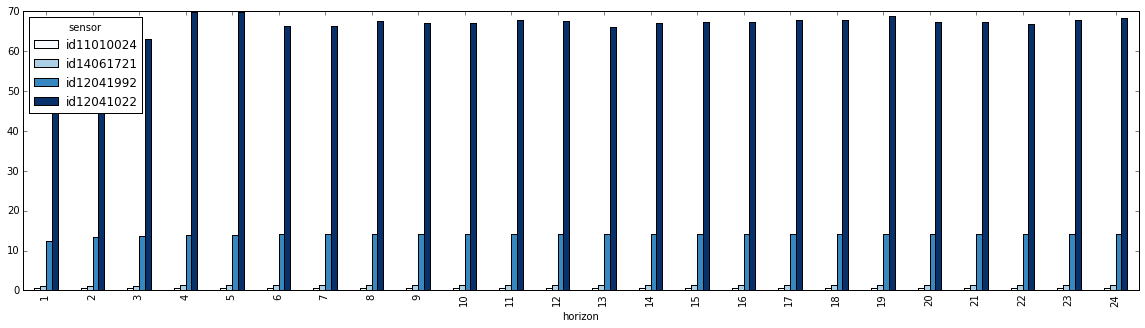

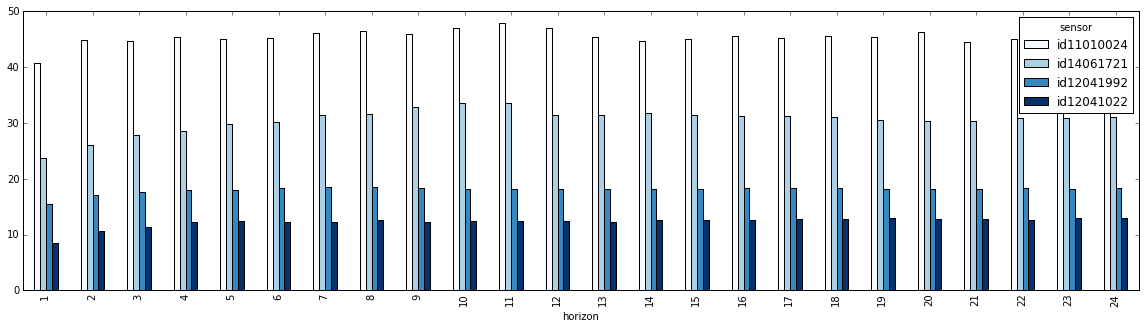

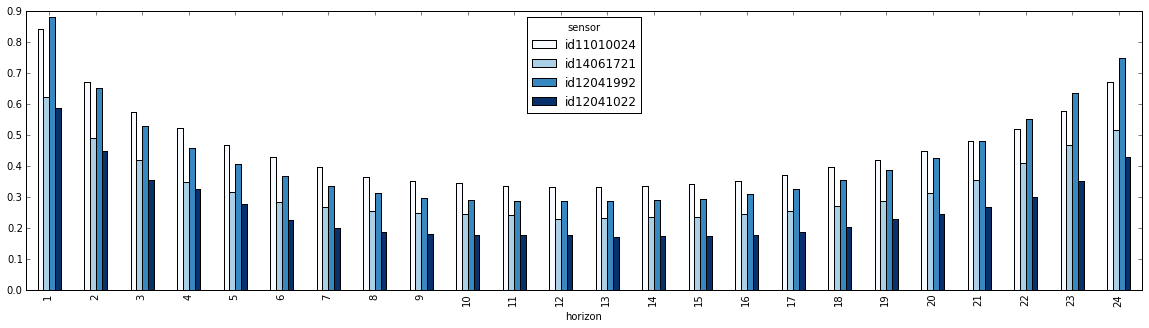

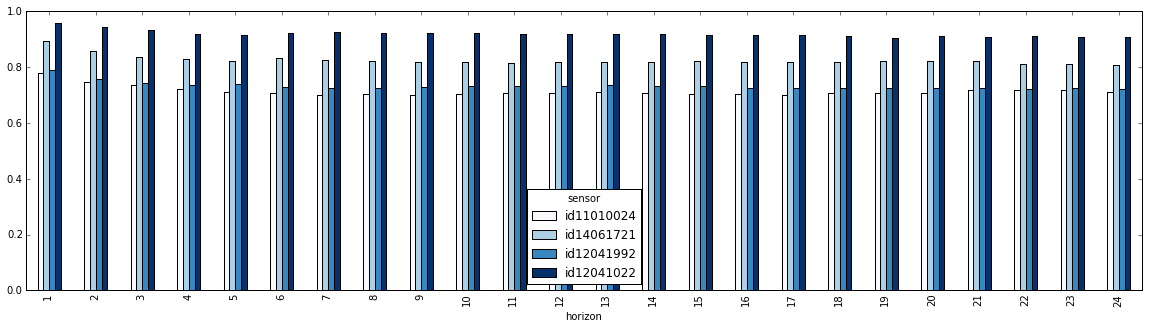

In [674]:
for err_measure in ["MAE","MAPE","MASE","R2"]:

    validation_df.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs(err_measure, level='error metric', axis=1).plot(
        kind='bar', figsize=(20,5), colormap='Blues')

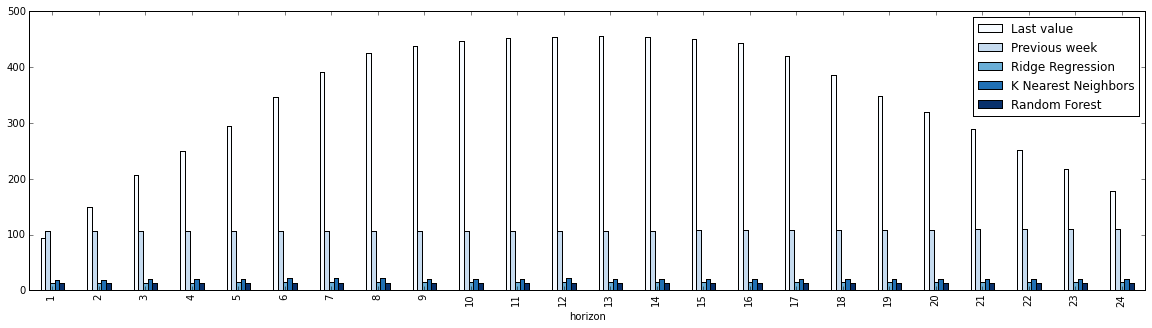

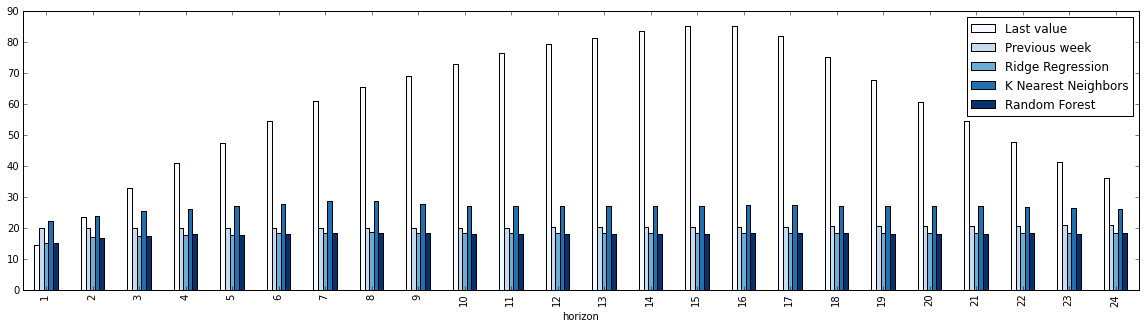

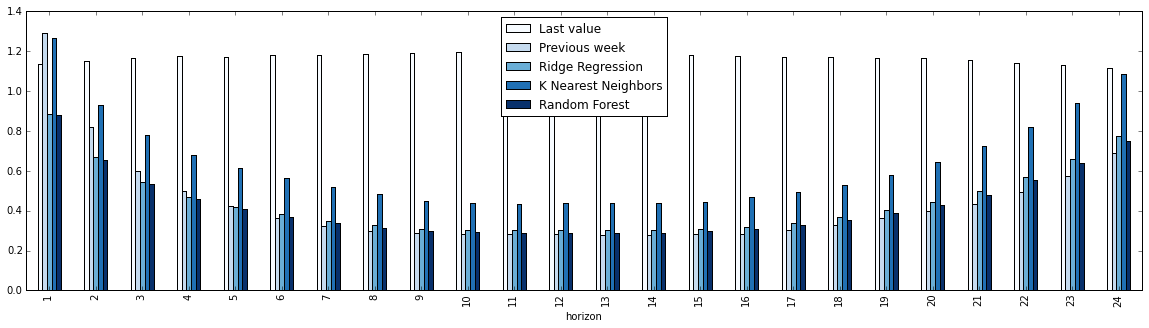

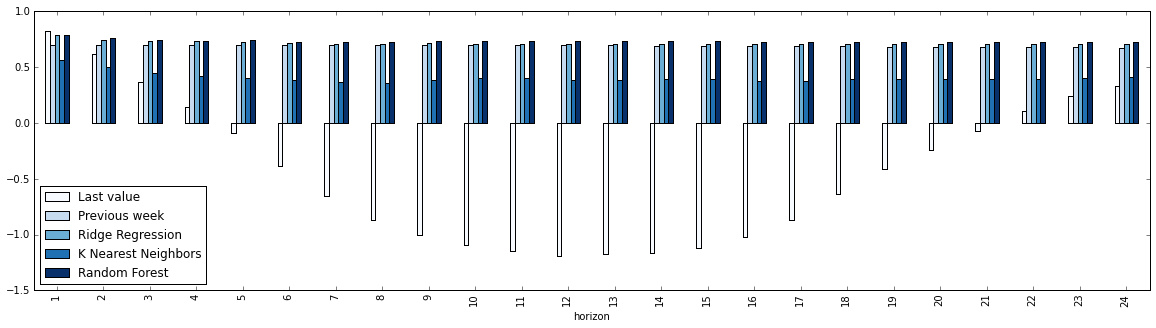

In [651]:
for err_measure in ["MAE","MAPE","MASE","R2"]:

    validation_df.xs(["Baselines"], level=["model"]).unstack()['id12041022'][err_measure][['Last value', 'Previous week']].join(
        validation_df.xs('AR_WF_DT',level="dataset")["id12041992"][err_measure].unstack().reindex_axis(
                validation_df.index.get_level_values(2).unique()[1:4], axis=1)).plot(
                    kind='bar', figsize=(20,5), colormap='Blues')

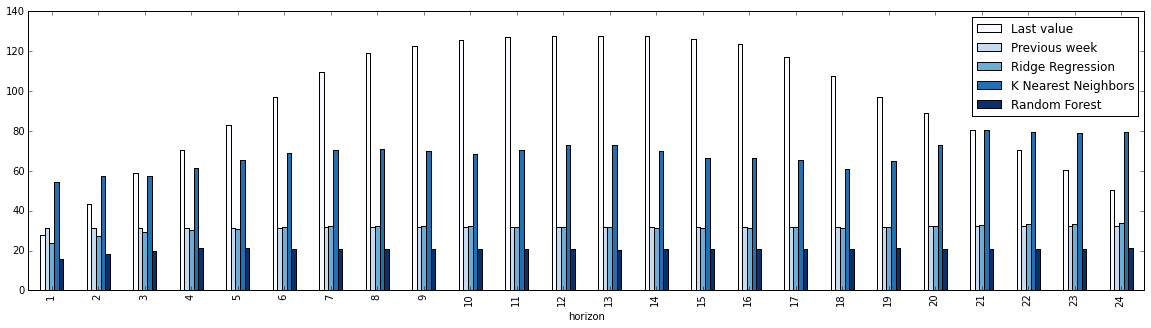

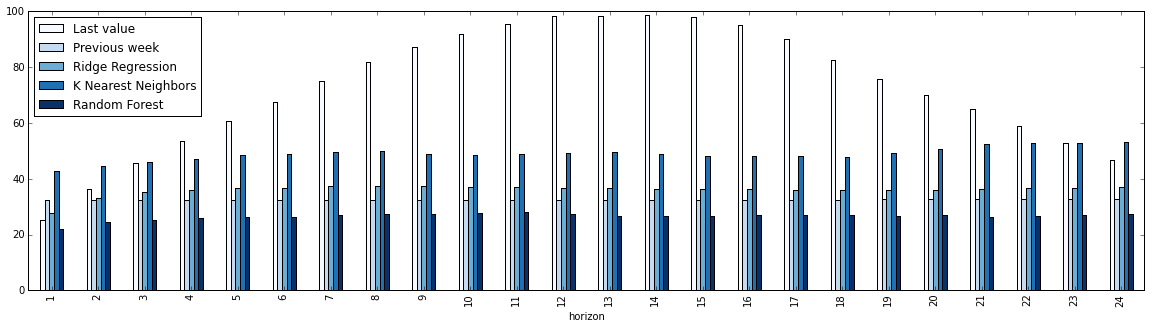

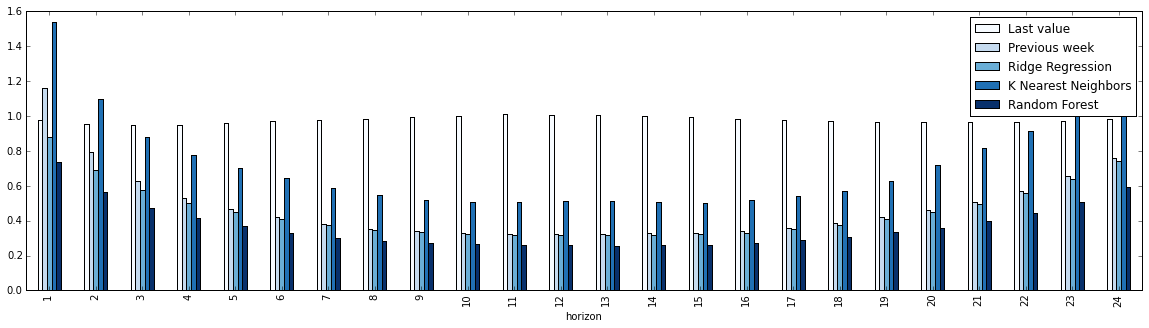

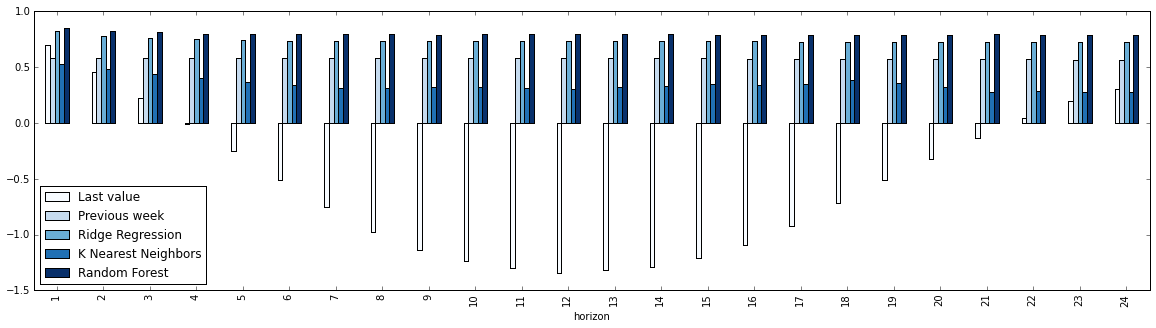

In [675]:
for err_measure in ["MAE","MAPE","MASE","R2"]:

    validation_df.xs(["Baselines"], level=["model"]).groupby(level='error metric', axis=1).mean().unstack()[err_measure][['Last value', 'Previous week']].join(
        validation_df.xs('AR_WF_DT',level="dataset").groupby(level='error metric', axis=1).mean().unstack()[err_measure].reindex_axis(
                validation_df.index.get_level_values(2).unique()[1:4], axis=1)).plot(
                    kind='bar', figsize=(20,5), colormap='Blues')

## Evaluation Scores Over All Horizons

In [13]:
validation_df.groupby(level=['dataset', 'model']).mean()

sensor                                  id14061721                       \
error metric                                    R2       MAE       MAPE   
dataset             model                                                 
Last value          Baselines             0.561509  1.675817  29.038490   
Previous day        Baselines             0.399188  2.035682  41.442958   
Previous week       Baselines             0.655598  1.569669  30.650789   
Measurement average Baselines             0.176525  3.042106  72.821162   
AR                  Ridge Regression      0.812825  1.276349  27.640770   
                    K Nearest Neighbors   0.785566  1.356553  29.801900   
                    Random Forest         0.823768  1.255085  29.553442   
SELECTED            Ridge Regression      0.755056  1.611357  39.967885   
                    K Nearest Neighbors   0.781093  1.401275  30.995457   
                    Random Forest         0.842835  1.194789  26.340880   

sensor                                             
error metric                                 MASE  
dataset             model                          
Last value          Baselines            0.728761  
Previous day        Baselines            0.939339  
Previous week       Baselines            0.724327  
Measurement average Baselines            1.378100  
AR                  Ridge Regression     0.575318  
                    K Nearest Neighbors  0.616033  
                    Random Forest        0.565061  
SELECTED            Ridge Regression     0.711889  
                    K Nearest Neighbors  0.631593  
                    Random Forest        0.538496

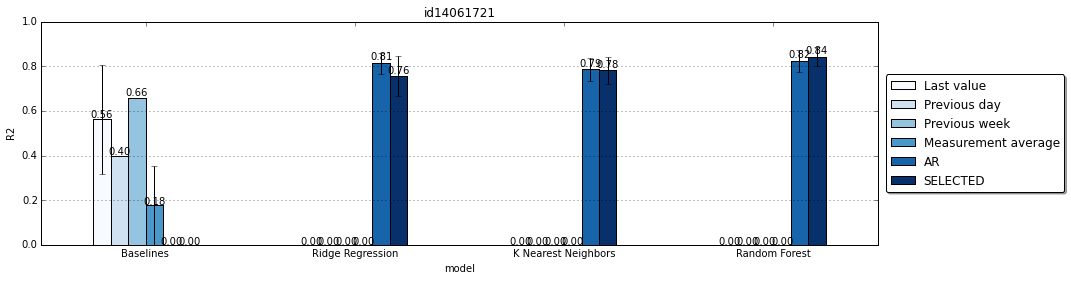

In [49]:
for sensor_id in validation_df.columns.levels[0]:
        
    err = validation_df.groupby(level=['dataset', 'model']).std()[sensor_id]['R2'].unstack(0)
            
    ax = validation_df.groupby(level=['dataset', 'model']).mean()[sensor_id]['R2'].unstack(0).plot(
        yerr=err, kind='bar', figsize=(15,4), rot=0, title=sensor_id, colormap='Blues', ylim=(0,1))
    
    for p in ax.patches:
        ax.annotate(str("%.2f" % p.get_height()), (p.get_x()+p.get_width()/2., p.get_height() * 1.02), fontsize=10, ha='center')
    
    plt.gca().yaxis.grid(True)
    ax.set_ylabel('R2')
    plt.legend(loc='right', bbox_to_anchor=(1.23, 0.5), ncol=1, fancybox=True, shadow=True)

### Errors only for specific prediction horizon

In [388]:
"""
for sensor_id in validation_df.columns.levels[0]:
    ax = validation_df.loc[20][sensor_id]['R2'].unstack(0).plot(
        kind='bar', figsize=(15,4), rot=0, title=sensor_id, colormap='Blues', ylim=(0,1))
    
    for p in ax.patches:
        ax.annotate(str("%.2f" % p.get_height()), (p.get_x()+p.get_width()/2., p.get_height() * 1.02), fontsize=10, ha='center')
    
    plt.gca().yaxis.grid(True)
    ax.set_ylabel(measure)
    plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1, fancybox=True, shadow=True)
"""

'\nfor sensor_id in validation_df.columns.levels[0]:\n    ax = validation_df.loc[20][sensor_id][\'R2\'].unstack(0).plot(\n        kind=\'bar\', figsize=(15,4), rot=0, title=sensor_id, colormap=\'Blues\', ylim=(0,1))\n    \n    for p in ax.patches:\n        ax.annotate(str("%.2f" % p.get_height()), (p.get_x()+p.get_width()/2., p.get_height() * 1.02), fontsize=10, ha=\'center\')\n    \n    plt.gca().yaxis.grid(True)\n    ax.set_ylabel(measure)\n    plt.legend(loc=\'right\', bbox_to_anchor=(1.2, 0.5), ncol=1, fancybox=True, shadow=True)\n'

## Evaluation Scores for Each Horizon

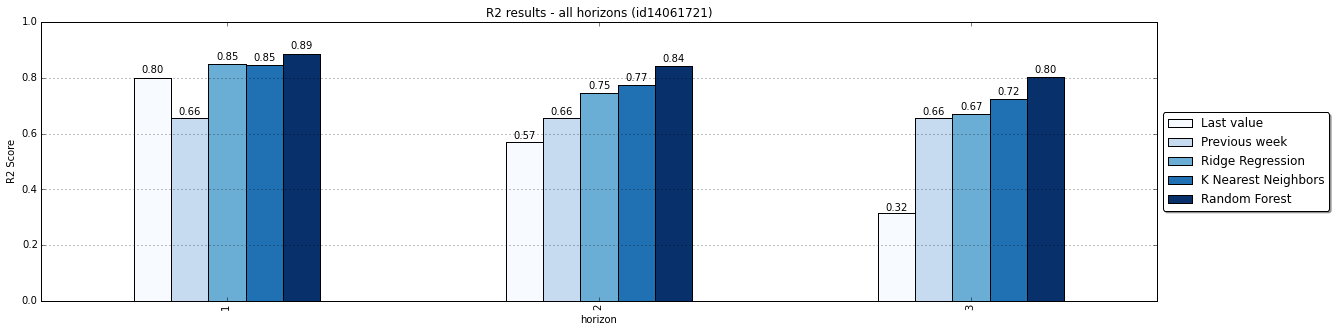

In [55]:
ax = validation_df.xs(["Baselines"], level=["model"]).unstack()['id12041022']['R2'][['Last value', 'Previous week']].join(
    validation_df.xs(["SELECTED"], level=["dataset"]).unstack()['id12041022']['R2']).plot(
    kind='bar', figsize=(20,5), title='R2 results - all horizons (id14061721)', ylim=(0,1), colormap='Blues')

for p in ax.patches:
    ax.annotate(str("%.2f" % p.get_height()), (p.get_x()+p.get_width()/2., p.get_height() * 1.02), fontsize=10, ha='center')

ax.yaxis.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True, shadow=True)
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0.), ncol=5, fancybox=True, shadow=True)
#plt.legend(loc=4)
plt.ylabel('R2 Score')

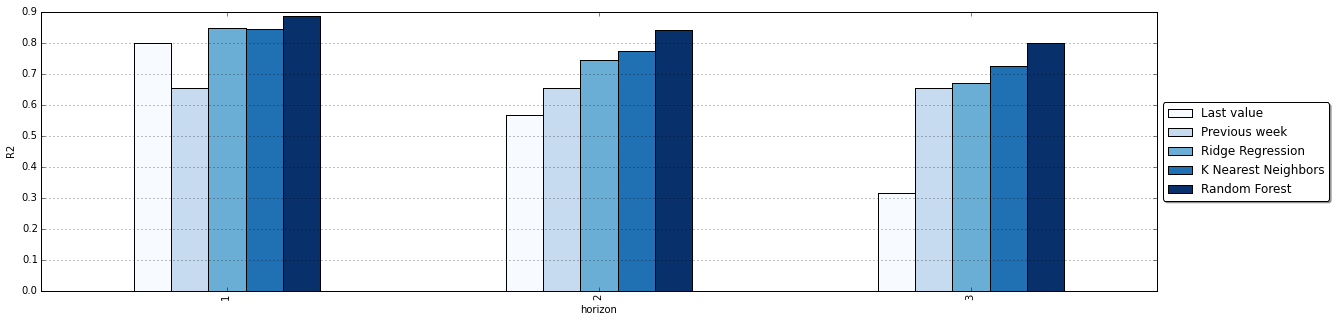

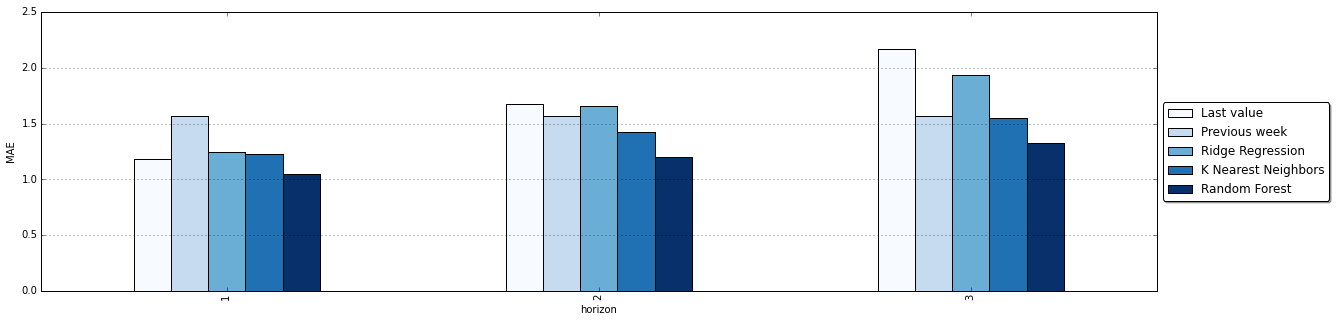

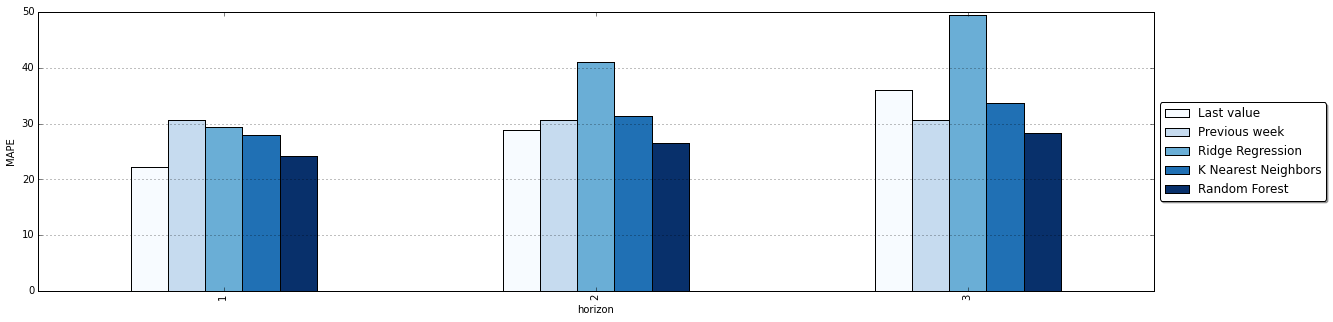

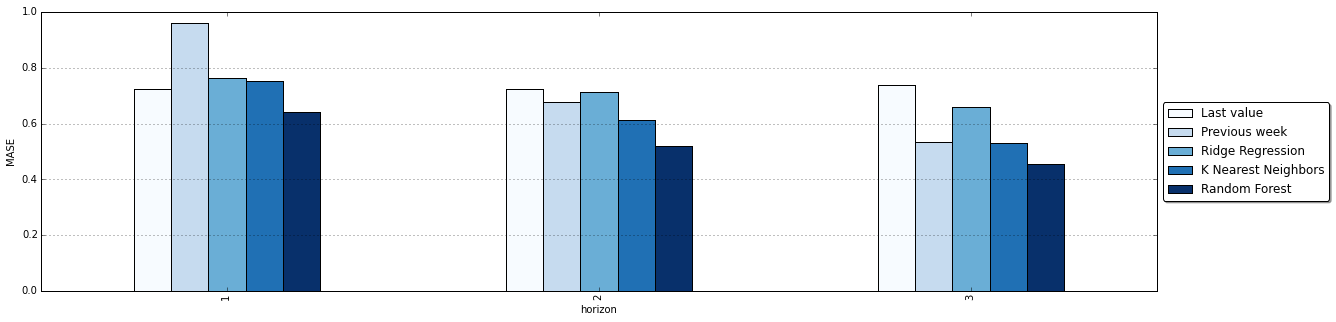

In [67]:
for measure in validation_df.columns.levels[1]:
    
    ax = validation_df.xs(["Baselines"], level=["model"]).unstack()['id12041022'][measure][['Last value', 'Previous week']].join(
        validation_df.xs(["SELECTED"], level=["dataset"]).unstack()['id12041022'][measure]).plot(
        kind='bar', figsize=(20,5), colormap='Blues')
    
    ax.yaxis.grid()   
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fancybox=True, shadow=True)
    plt.ylabel(measure)
 

## Average Score by Sensors and Horizons

In [16]:
validation_df.groupby(level=['dataset', 'model']).mean().groupby(level='error metric', axis=1).mean()

error metric                                   R2       MAE       MAPE  \
dataset             model                                                
Last value          Baselines            0.561509  1.675817  29.038490   
Previous day        Baselines            0.399188  2.035682  41.442958   
Previous week       Baselines            0.655598  1.569669  30.650789   
Measurement average Baselines            0.176525  3.042106  72.821162   
AR                  Ridge Regression     0.812825  1.276349  27.640770   
                    K Nearest Neighbors  0.785566  1.356553  29.801900   
                    Random Forest        0.823768  1.255085  29.553442   
SELECTED            Ridge Regression     0.755056  1.611357  39.967885   
                    K Nearest Neighbors  0.781093  1.401275  30.995457   
                    Random Forest        0.842835  1.194789  26.340880   

error metric                                 MASE  
dataset             model                          
Last value          Baselines            0.728761  
Previous day        Baselines            0.939339  
Previous week       Baselines            0.724327  
Measurement average Baselines            1.378100  
AR                  Ridge Regression     0.575318  
                    K Nearest Neighbors  0.616033  
                    Random Forest        0.565061  
SELECTED            Ridge Regression     0.711889  
                    K Nearest Neighbors  0.631593  
                    Random Forest        0.538496

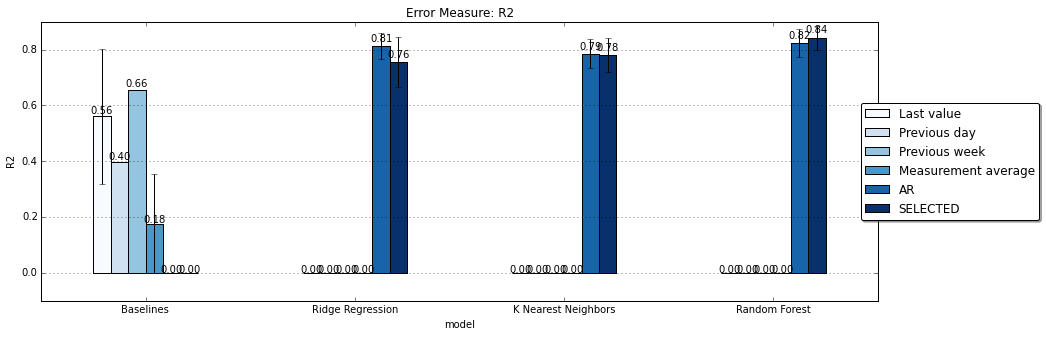

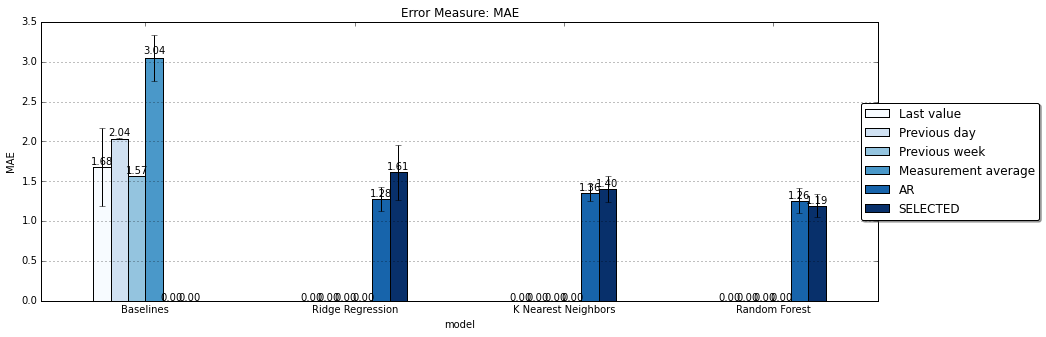

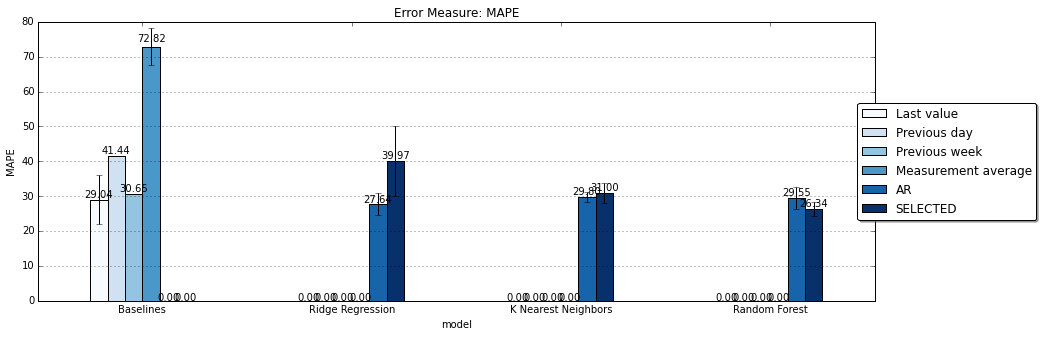

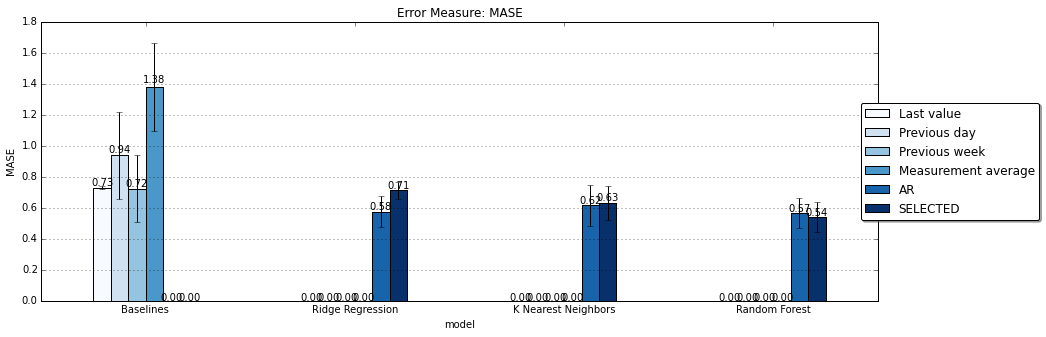

In [18]:
for measure in validation_df.columns.levels[1]:

    err = ax = validation_df.groupby(level=['dataset', 'model']).std().groupby(
        level='error metric', axis=1).mean()[measure].unstack(0)
    
    ax = validation_df.groupby(level=['dataset', 'model']).mean().groupby(
        level='error metric', axis=1).mean()[measure].unstack(0).plot(
        yerr=err, kind='bar', figsize=(15,5), rot=0, title="Error Measure: {}".format(measure), colormap='Blues')

    for p in ax.patches:
        ax.annotate(str("%.2f" % p.get_height()), (p.get_x()+p.get_width()/2., p.get_height() * 1.02), fontsize=10, ha='center')
    
    plt.gca().yaxis.grid(True)
    ax.set_ylabel(measure)
    plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1, fancybox=True, shadow=True)

NOTE: From this, it looks like weather does not help to improve accuracy. Date time features are the most important.